In [1]:
# 기본
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 경고 뜨지 않게...
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams['axes.unicode_minus'] = False

# 시간 관리를 위한 라이브러리
import datetime

# 데이터 수집
from pandas_datareader import data
import requests
from bs4 import BeautifulSoup
import re
import time
import os
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import Select

# 화면 청소
from IPython.display import clear_output

# 데이터 전처리 알고리즘
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

# 학습용과 검증용으로 나누는 함수
from sklearn.model_selection import train_test_split

# 교차검증
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# 하이퍼 파라미터 튜닝
from sklearn.model_selection import GridSearchCV

# 분류 알고리즘
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

# 회귀 알고리즘
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor

# 분류용 평가 함수
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# 회귀용 평가 함수
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 차원 축소
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# 군집
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift

# 형태소 분석도구
from soynlp.utils import DoublespaceLineCorpus
from soynlp.noun import LRNounExtractor_v2
from soynlp.noun import LRNounExtractor
from soynlp.noun import NewsNounExtractor

# 워드 클라우드
from collections import Counter
import pytagcloud
from IPython.display import Image

pygame 2.1.2 (SDL 2.0.18, Python 3.8.12)
Hello from the pygame community. https://www.pygame.org/contribute.html


### 데이터를 읽어온다.


In [2]:
df = pd.read_csv('data/namu_wiki_data.csv')
df

,title,text
0,민수하,니지산지 KR\n라이버 목록\n(일본 니지산지로\n통합 예정) 니지산지 KR\n라...
1,리틀맥(스매시브라더스 시리즈),스매시브라더스 시리즈의 참전 파이터 [ 펼치기 · 접기 ]\n\n\n마리오\n\n동...
2,OZ Gaming/오버워치,상위 문서: OZ Gaming 오즈 게이밍 OZ Gaming 창단 2018년 10...
3,이반 프란코,인테르 선정 위대한 우크라이나인 [ 펼치기 · 접기 ] ...
4,신미도,"SIN MIDO 항목 참조. 싱어송라이터 신미도\n가수, 프로듀서, 영상감독 북..."
...,...,...
94,파일:스팍스 튀니지 성벽 2.jpg,이 파일은 나무위키에서 제한된 한도 안에서 쓰입니다.\n\n본 이미지는 퍼블릭 도메...
95,교토부 제1구,긴키 지방의 국회의원 [ 참의원 의원 ] ...
96,쿠키런: 오븐브레이크/사건 사고,가입 후 15일이 지나야 편집 가능한 문서입니다. 상위 문서: 쿠키런: 오븐브레...
97,시흥 버스 26,시흥시 시내버스 [ 펼치기 · 접기 ] 1. 노선 정보\n2. ...


In [3]:
df = pd.read_csv('data/naver_openapi_json.csv')
df


,title,description,pubDate
0,"남서울농협, 11년 연속 'NH농협카드 연도대상' 수상","안용승 조합장은 ""코로나19로 인한 비대면 활성화와 급변하는 금융환경 등 사업추진에...","Fri, 04 Mar 2022 10:00:00 +0900"
1,신규확진 하루새 약 7만명 늘어 26만명대…사망 186명 역대최다(종합),"26만6853명, 위중증 797명…중증병상 가동률 50.5% 내일부터 식당·카페 등...","Fri, 04 Mar 2022 10:00:00 +0900"
2,"'중증화 예방·오미크론 확산 방지'…고양시, 노인맞춤돌봄 수행기관에 신속 ...",고양시가 코로나19 증상이 있는 요보호 홀몸 어르신의 확진 여부를 신속히 파악해 중...,"Fri, 04 Mar 2022 10:00:00 +0900"
3,"의령군, 2021년산 시장격리곡 매입",최승동 의령군농업기술센터소장은 ”시장격리곡 매입이 2021년산 쌀의 과잉생산으로 판...,"Fri, 04 Mar 2022 10:00:00 +0900"
4,[위클리오늘] 신규확진 26만6853명…사망자도 186명 '역대 최다',코로나19 신규 확진자가 19만8803명으로 집계된 3일 오전 서울 송파구보건소 선...,"Fri, 04 Mar 2022 10:00:00 +0900"
...,...,...,...
995,"이철우 경북지사, 사전투표 마쳐","특히 코로나 확진자도 별도의 시간을 통해 투표가 가능하니 꼭 투표해달라"" 이철우 경...","Fri, 04 Mar 2022 08:57:00 +0900"
996,"전해철 ""유흥시설, 식당·카페 등 11시까지 영업 허용""",= 전해철 중앙재난안전대책본부 2차장(행정안전부 장관)이 4일 오전 서울 종로구 정...,"Fri, 04 Mar 2022 08:57:00 +0900"
997,"군포시, 도서관 특화주제 '시민연구모임'에 참여하세요..","최재훈 특화사업과장은 ""코로나19로 시민들이 사회적으로 고립되고 불안한 시대를 살아...","Fri, 04 Mar 2022 08:57:00 +0900"
998,"""힘들 때 가장 먼저 찾는 서비스 만드는 게 목표예요""",모두 괜찮은 척 하지만 실제로는 곪아 썩어가고 있을지 모르는 '코로나 블루' 3년 ...,"Fri, 04 Mar 2022 08:57:00 +0900"


In [4]:
# 결측치 확인
df.isna().sum()


title          0
description    5
pubDate        0
dtype: int64

In [5]:
# 결측치 제거
df.dropna(inplace=True)
df.isna().sum()


title          0
description    0
pubDate        0
dtype: int64

### 한글 정제


In [6]:
def text_cleaning(text) :
    # 한글 정규식 정의(띄어쓰기, ㄱ ~ ㅣ, 가 ~ 힣)
    hangul = re.compile('[^ ㄱ-ㅣ가-힣]')
    # 정규식에 위배되는 것들일 길이가 0인 문자열로 변환한다.
    result = hangul.sub('', text)
    return result


In [7]:
# 한글 정제
df['title'] = df['title'].apply(lambda x : text_cleaning(x))
df['description'] = df['description'].apply(lambda x : text_cleaning(x))

df


,title,description,pubDate
0,남서울농협 년 연속 농협카드 연도대상 수상,안용승 조합장은 코로나로 인한 비대면 활성화와 급변하는 금융환경 등 사업추진에 어려...,"Fri, 04 Mar 2022 10:00:00 +0900"
1,신규확진 하루새 약 만명 늘어 만명대사망 명 역대최다종합,만명 위중증 명중증병상 가동률 내일부터 식당카페 등 오후 시까지 영업시간 연장 오...,"Fri, 04 Mar 2022 10:00:00 +0900"
2,중증화 예방오미크론 확산 방지고양시 노인맞춤돌봄 수행기관에 신속,고양시가 코로나 증상이 있는 요보호 홀몸 어르신의 확진 여부를 신속히 파악해 중증화...,"Fri, 04 Mar 2022 10:00:00 +0900"
3,의령군 년산 시장격리곡 매입,최승동 의령군농업기술센터소장은 시장격리곡 매입이 년산 쌀의 과잉생산으로 판매처를 찾...,"Fri, 04 Mar 2022 10:00:00 +0900"
4,위클리오늘 신규확진 만명사망자도 명 역대 최다,코로나 신규 확진자가 만명으로 집계된 일 오전 서울 송파구보건소 선별검사소에서 시민...,"Fri, 04 Mar 2022 10:00:00 +0900"
...,...,...,...
995,이철우 경북지사 사전투표 마쳐,특히 코로나 확진자도 별도의 시간을 통해 투표가 가능하니 꼭 투표해달라 이철우 경북...,"Fri, 04 Mar 2022 08:57:00 +0900"
996,전해철 유흥시설 식당카페 등 시까지 영업 허용,전해철 중앙재난안전대책본부 차장행정안전부 장관이 일 오전 서울 종로구 정부서울청사...,"Fri, 04 Mar 2022 08:57:00 +0900"
997,군포시 도서관 특화주제 시민연구모임에 참여하세요,최재훈 특화사업과장은 코로나로 시민들이 사회적으로 고립되고 불안한 시대를 살아가고 ...,"Fri, 04 Mar 2022 08:57:00 +0900"
998,힘들 때 가장 먼저 찾는 서비스 만드는 게 목표예요,모두 괜찮은 척 하지만 실제로는 곪아 썩어가고 있을지 모르는 코로나 블루 년 차 그...,"Fri, 04 Mar 2022 08:57:00 +0900"


In [8]:
noun_extractor = NewsNounExtractor()
nouns = noun_extractor.train_extract(df['description'].values)
nouns


used default noun predictor; Sejong corpus based logistic predictor
C:/Users/inkwabusan/.conda/envs/ds/lib/site-packages/soynlp
local variable 'f' referenced before assignment
local variable 'f' referenced before assignment
scan vocabulary ... 
done (Lset, Rset, Eojeol) = (13502, 8098, 6786)
predicting noun score was done                                        
before postprocessing 2996
_noun_scores_ 823
checking hardrules ... done
after postprocessing 511
extracted 8 compounds from eojeols

{'가공식품외식업계': NewsNounScore(score=0, frequency=8, feature_proportion=0, eojeol_proportion=1.0, n_positive_feature=0, unique_positive_feature_proportion=0),
 '문화예술': NewsNounScore(score=0, frequency=20, feature_proportion=0, eojeol_proportion=1.0, n_positive_feature=0, unique_positive_feature_proportion=0),
 '특별사전투표소': NewsNounScore(score=0, frequency=17, feature_proportion=0, eojeol_proportion=1.0, n_positive_feature=0, unique_positive_feature_proportion=0),
 '신고기간': NewsNounScore(score=0, frequency=7, feature_proportion=0, eojeol_proportion=1.0, n_positive_feature=0, unique_positive_feature_proportion=0),
 '감염확산': NewsNounScore(score=0, frequency=3, feature_proportion=0, eojeol_proportion=1.0, n_positive_feature=0, unique_positive_feature_proportion=0),
 '최다위중증': NewsNounScore(score=0, frequency=3, feature_proportion=0, eojeol_proportion=1.0, n_positive_feature=0, unique_positive_feature_proportion=0),
 '투표참여': NewsNounScore(score=0, frequency=3, feature_proportion=0, eojeol_proportion

In [9]:
print(len(nouns))


519


In [10]:
data_dict = {}


In [12]:
# 제외할 단어 목록
stopwords = ['코로나']

for key in nouns :
    # 현재 단어가 제외할 단어라면 다음으로 넘어간다.
    if key in stopwords :
        continue
    
    # 빈도수가 20이상이고 확률이 1.0 이상인 것만 추출한다.
    if nouns[key].frequency >= 20 and nouns[key].score >= 1.0 :
        # 워드클라우드가 1글자가 있으면 문제가 생기때문에 2 글자 
        # 이상이 것만 담는다.
        if len(key) > 1 :
            data_dict[key] = nouns[key].frequency
            
data_dict


{'이날': 83, '시각': 53, '기표': 40, '대웅제': 20, '소아': 21, '실제': 20}

### 워드클라우드

In [16]:
# 워드 클라우드를 위한 객체로 생성한다.
counter1 = Counter(data_dict)
counter1


Counter({'이날': 83, '시각': 53, '기표': 40, '대웅제': 20, '소아': 21, '실제': 20})

In [17]:
# 가장 빈도수가 높은 단어 100개를 추출한다.
cloud_data = counter1.most_common(100)
cloud_data


[('이날', 83), ('시각', 53), ('기표', 40), ('소아', 21), ('대웅제', 20), ('실제', 20)]

In [18]:
cloud_data = pytagcloud.make_tags(cloud_data)

pytagcloud.create_tag_image(cloud_data, 'naver_keyword.jpg',
                           size=(900, 600), fontname='NanumGothic',
                           rectangular=False)


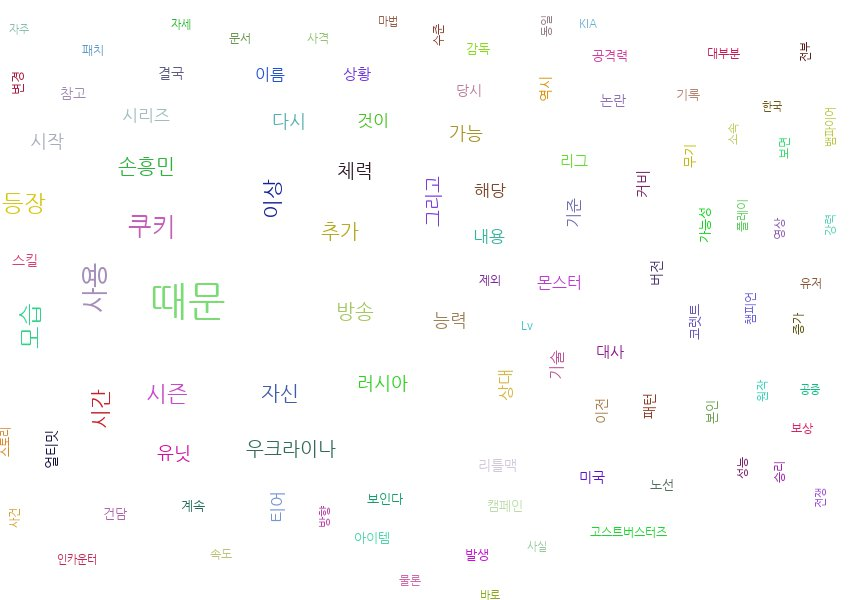

In [20]:
Image(filename='text_word.jpg')


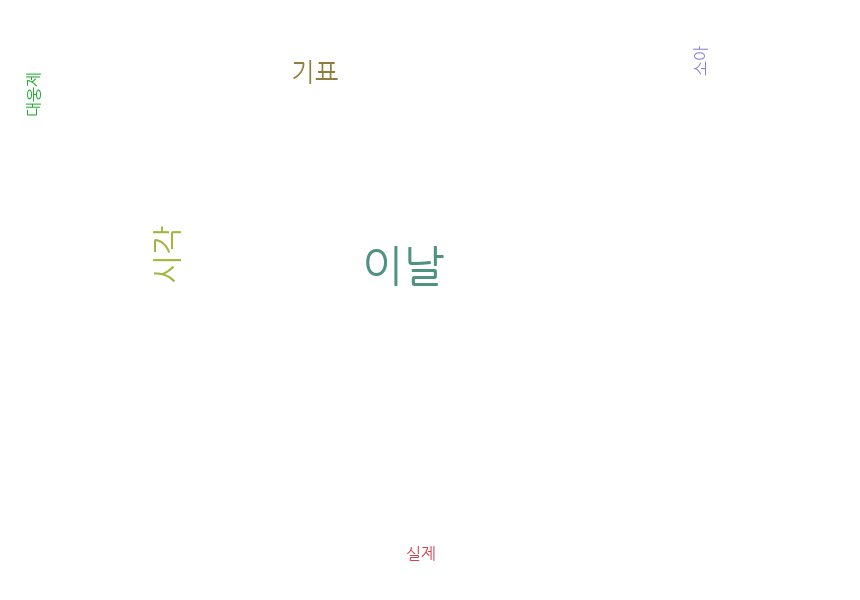

In [21]:
Image(filename='naver_keyword.jpg')
